In [17]:
library(tidyverse)
library(rnoaa)

setwd("/home/joosungm/projects/def-lelliott/joosungm/projects/peak-bloom-prediction/code/")
source("./F01_functions.r")

kyoto_cities <- read.csv("../outputs/A_outputs/A11_kyoto_group_cities.csv")[, "x"]
kyoto_cities <- c(kyoto_cities, "Kyoto")
kyoto_cities

[1] "Osaka"     "Nagoya"    "Tsu"       "Gifu"      "Kobe"      "Tottori"  
 [7] "Wakayama"  "Fukui"     "Okayama"   "Takamatsu" "Kyoto"

In [13]:
# pull stations that are located in similar latitude to Kyoto (35.01)
station_df <- read.csv("../outputs/A_outputs/A31_stations.csv") %>%
    filter(str_sub(id, start = 1, end = 2) == "JA") %>%
    filter(2021 < last_year) %>%
    filter(first_year < 1953) %>%
    filter(name %in% toupper(kyoto_cities))
station_cities <- station_df$name
# dim(station_df)
# station_df

# pull cherry_sub.csv
cherry_sub <- read.csv("../outputs/A_outputs/A11_cherry_sub.csv") %>%
    filter(country == "Japan") %>%
    filter(toupper(city) %in% station_cities)

cities <- unique(cherry_sub$city)
station_ids <- station_df[station_df$name %in% toupper(cherry_sub$city), "id"]
station_ids # 9 station ids

id_city <- station_df[station_df$name %in% toupper(cherry_sub$city), c("id", "name", "latitude", "longitude", "elevation")]
write.csv(id_city, "../outputs/A_outputs/A31_japan_station_city.csv")
id_city

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”


[1] "JA000047616" "JA000047632" "JA000047636" "JA000047651" "JA000047746"
 [6] "JA000047759" "JA000047768" "JA000047770" "JA000047777" "JA000047891"

,id,name,latitude,longitude,elevation
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,JA000047616,FUKUI,36.050,136.217,17
2,JA000047632,GIFU,35.400,136.767,17
3,JA000047636,NAGOYA,35.167,136.967,56
4,JA000047651,TSU,34.733,136.517,18
5,JA000047746,TOTTORI,35.483,134.233,16
6,JA000047759,KYOTO,35.017,135.733,46
7,JA000047768,OKAYAMA,34.667,133.917,18
8,JA000047770,KOBE,34.700,135.217,30
9,JA000047777,WAKAYAMA,34.233,135.167,18


In [4]:
# cherry_sub %>% filter(city == "Kyoto")

In [6]:
# Obtain Historic daily temperature
# library(tidyverse)
# library(rnoaa)

# get_temperature <- function (stationid) {
#     dat <- ghcnd_search(stationid = stationid, var = c("TMAX", "TMIN", "PRCP"), 
#                date_min = "1950-01-01", date_max = "2023-01-31") %>%
#                purrr::reduce(left_join, by = "date") %>%
#                select(id.x, date, tmax, tmin, prcp) %>%
#                rename_with(~ "id", id.x) %>%
#                mutate(tmax = tmax/10) %>%      # in C
#                mutate(tmin = tmin/10) %>%      # in C
#                mutate(prcp = prcp/10) %>%      # in mm
#                mutate(year = format(date, "%Y")) %>%
#                mutate(month = as.integer(strftime(date, '%m'))) %>%
#                mutate(day = as.integer(strftime(date, '%d'))) %>%
#                mutate(row_num = rownames(.)) %>%
#                mutate(id_rownum = paste0(id, "-", row_num))
    
#     return(dat)
# }


# city_temp_list <- list()
# imp_ids <- list()

# for (c in seq_len(length(station_ids))) {
#     print(cities[c])
#     skip_to_next <- 0
    
#     temp_df <- tryCatch(get_temperature(station_ids[c]), error = function(x) skip_to_next <<-1)
    
#     if (skip_to_next == 1 ){
#         next
#     }

#     # Impute missing data
#     library(mice)

#     # check missing data
#     if (nrow(md.pattern(temp_df)) > 1) {
        
#         tempData <- mice(temp_df, m = 5, method = "pmm")
#         # summary(tempData)
        
#         imp_tmin <- tempData$imp$tmin[5] %>%
#             mutate(row_num = rownames(.))
#         imp_tmax <- tempData$imp$tmax[5] %>%
#             mutate(row_num = rownames(.))
#         imp_prcp <- tempData$imp$prcp[5] %>%
#             mutate(row_num = rownames(.))
        
#         imps_df <- rbind(imp_tmin, imp_tmax, imp_prcp) %>%
#             'rownames<-'(NULL) %>%
#             distinct(row_num) %>%
#             mutate(id = station_ids[c]) %>%
#             mutate(id_rownum = paste0(id, "-", row_num))

#         imp_ids[[c]] <- imps_df
        
#         # complete set
#         imputed_temp <- complete(tempData, 5)
    
#     } else {
        
#         imputed_temp <- temp_df

#     }

    
#     # imputed_file_name <- paste0("/home/joosungm/projects/def-lelliott/joosungm/projects/peak-bloom-prediction/A_outputs/A21_", cities[c], "_temperature.csv")
#     # print(imputed_file_name)
#     # write.csv(imputed_temp, imputed_file_name)

#     city_temp_list[[c]] <- imputed_temp

# }
# length(city_temp_list)
# # head(city_temp_list[[9]])
# # head(imp_ids[[9]])

[1] "Fukui"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047616.dly

date created (size, mb): 2023-02-14 16:59:00 (1.506)

file min/max dates: 1951-01-01 / 2023-02-28




 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Gifu"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047632.dly

date created (size, mb): 2023-02-13 13:04:39 (1.565)

file min/max dates: 1951-01-01 / 2023-02-28




 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Nagoya"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047636.dly

date created (size, mb): 2023-02-09 16:11:52 (1.721)

file min/max dates: 1951-01-01 / 2022-10-31



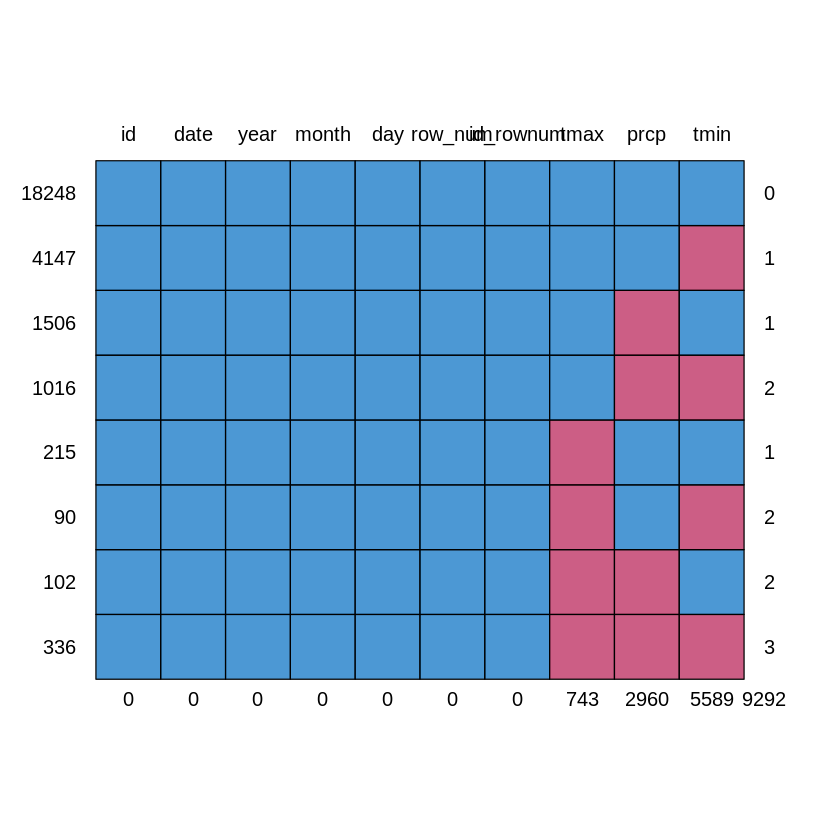


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Tsu"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047651.dly

date created (size, mb): 2023-02-09 16:59:22 (1.536)

file min/max dates: 1951-01-01 / 2022-10-31



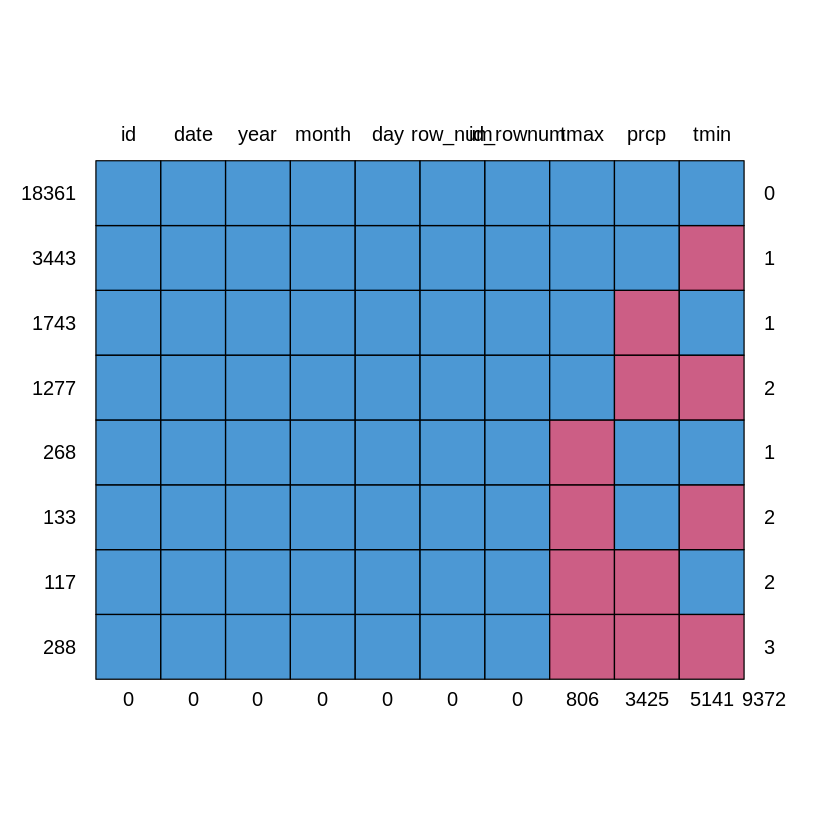


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Tottori"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047746.dly

date created (size, mb): 2023-02-13 13:04:53 (1.702)

file min/max dates: 1951-01-01 / 2022-10-31



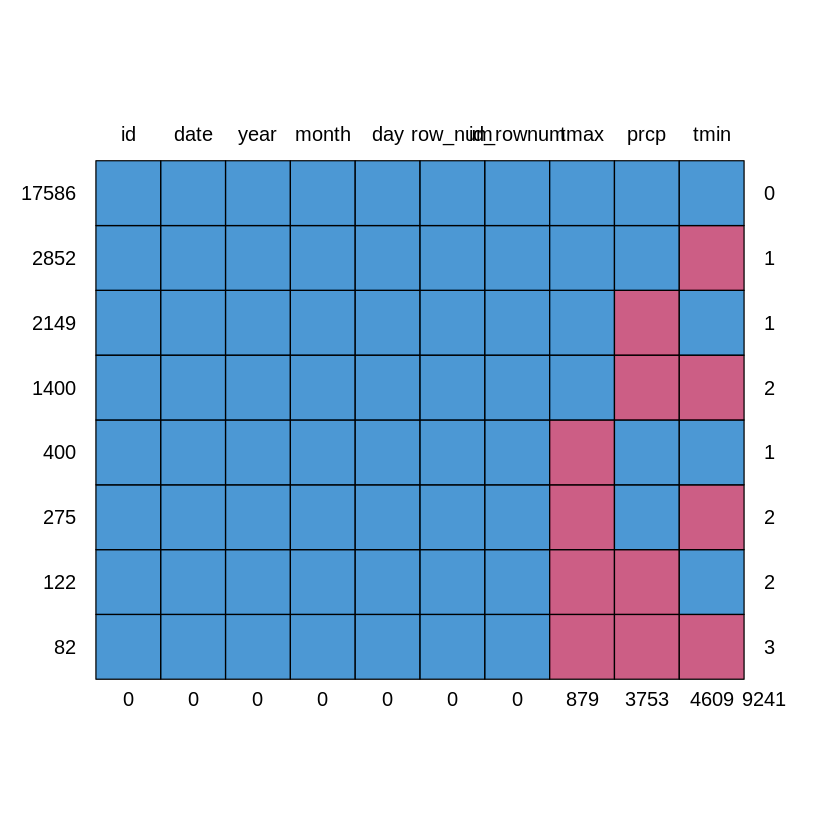


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Kyoto"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047759.dly

date created (size, mb): 2023-02-06 22:23:45 (1.687)

file min/max dates: 1945-10-01 / 2023-02-28



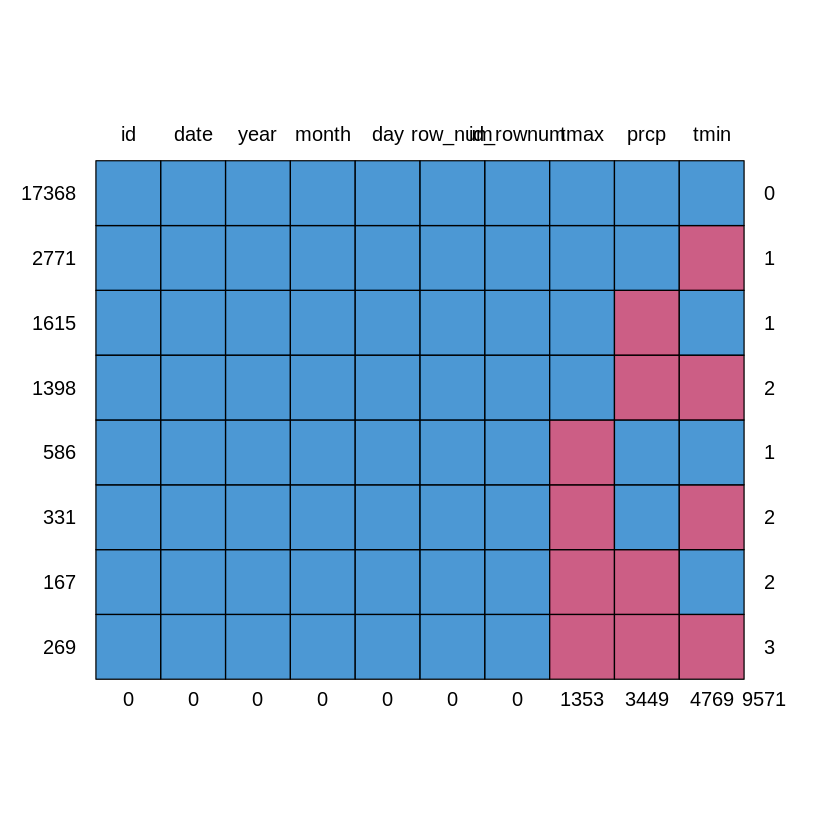


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Okayama"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047768.dly

date created (size, mb): 2023-02-09 17:04:56 (1.543)

file min/max dates: 1951-01-01 / 2023-02-28



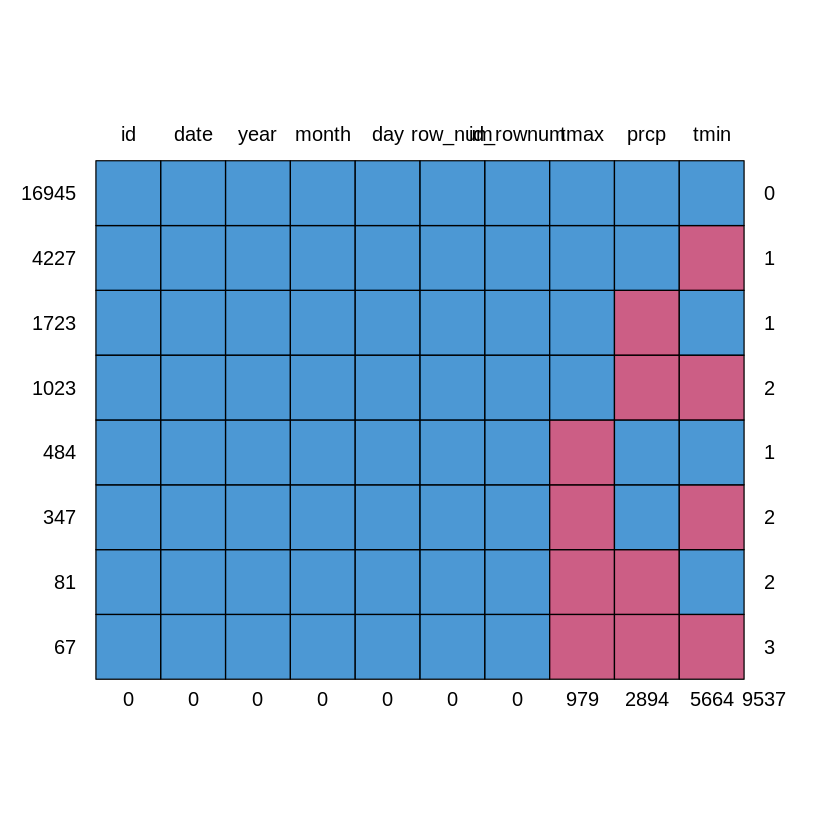


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Kobe"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047770.dly

date created (size, mb): 2023-02-09 17:05:37 (1.668)

file min/max dates: 1951-01-01 / 2023-02-28



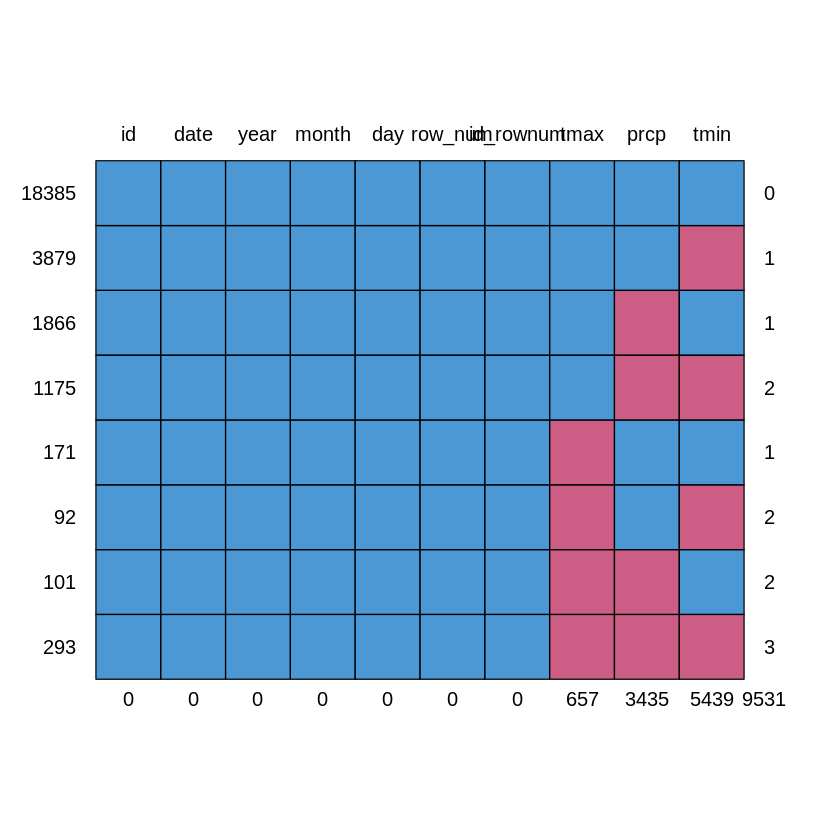


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Wakayama"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047777.dly

date created (size, mb): 2023-02-14 16:59:32 (1.672)

file min/max dates: 1951-01-01 / 2023-02-28



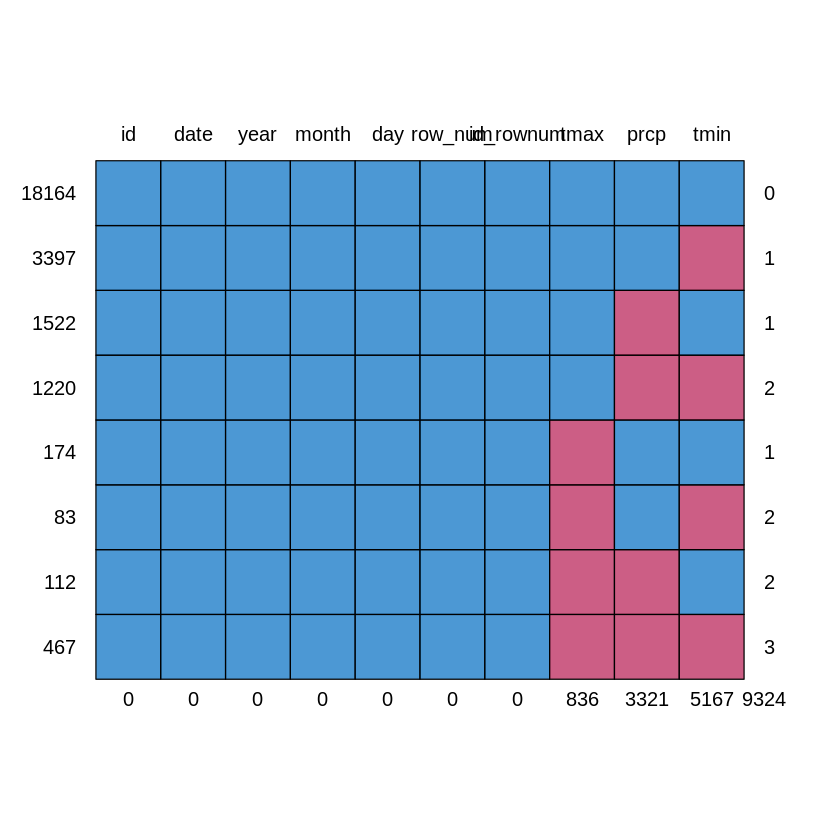


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


[1] "Takamatsu"


using cached file: ~/.cache/R/noaa_ghcnd/JA000047891.dly

date created (size, mb): 2023-02-14 16:59:37 (1.62)

file min/max dates: 1951-01-01 / 2022-10-31



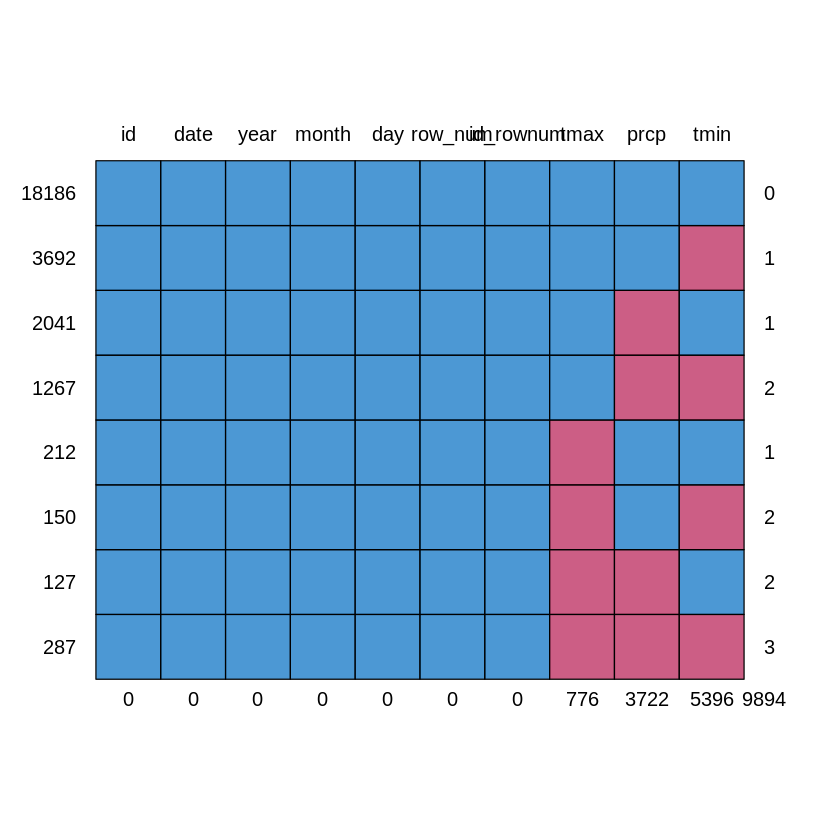


 iter imp variable
  1   1  tmax  tmin  prcp
  1   2  tmax  tmin  prcp
  1   3  tmax  tmin  prcp
  1   4  tmax  tmin  prcp
  1   5  tmax  tmin  prcp
  2   1  tmax  tmin  prcp
  2   2  tmax  tmin  prcp
  2   3  tmax  tmin  prcp
  2   4  tmax  tmin  prcp
  2   5  tmax  tmin  prcp
  3   1  tmax  tmin  prcp
  3   2  tmax  tmin  prcp
  3   3  tmax  tmin  prcp
  3   4  tmax  tmin  prcp
  3   5  tmax  tmin  prcp
  4   1  tmax  tmin  prcp
  4   2  tmax  tmin  prcp
  4   3  tmax  tmin  prcp
  4   4  tmax  tmin  prcp
  4   5  tmax  tmin  prcp
  5   1  tmax  tmin  prcp
  5   2  tmax  tmin  prcp
  5   3  tmax  tmin  prcp
  5   4  tmax  tmin  prcp
  5   5  tmax  tmin  prcp


Warning message:
“Number of logged events: 4”


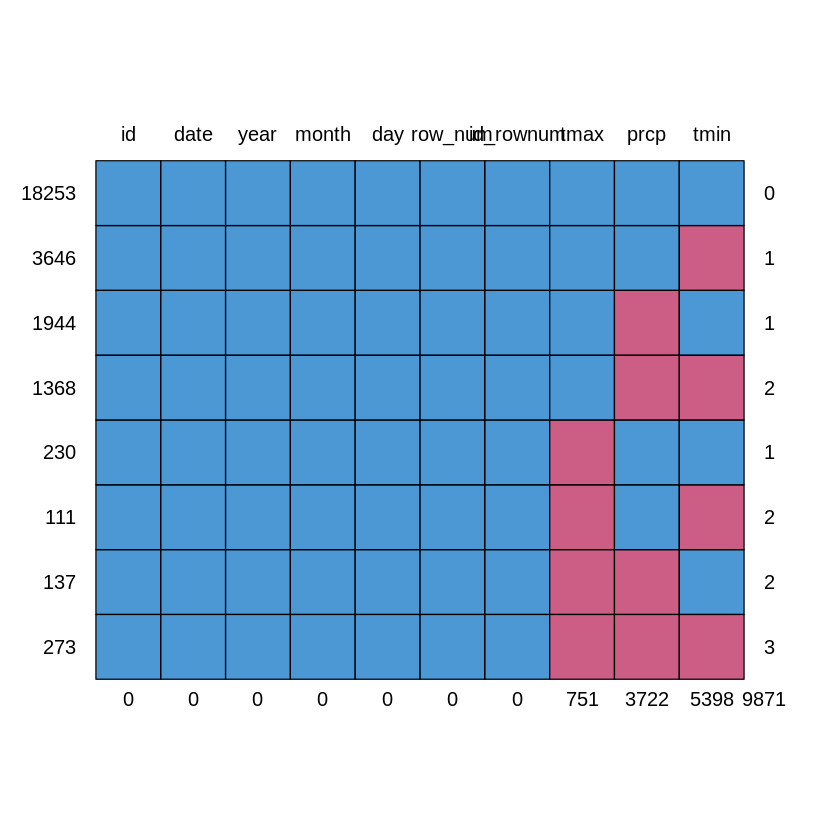

,id,date,tmax,tmin,prcp,year,month,day,row_num,id_rownum
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
1,JA000047616,1951-01-01,3.7,0.3,34.8,1951,1,1,1,JA000047616-1
2,JA000047616,1951-01-02,3.5,-1.3,3.5,1951,1,2,2,JA000047616-2
3,JA000047616,1951-01-03,4.7,-1.3,7.2,1951,1,3,3,JA000047616-3
4,JA000047616,1951-01-04,5.8,0.3,3.7,1951,1,4,4,JA000047616-4
5,JA000047616,1951-01-05,5.0,-0.3,5.8,1951,1,5,5,JA000047616-5
6,JA000047616,1951-01-06,5.4,-0.4,0.0,1951,1,6,6,JA000047616-6


[1] 253389     10

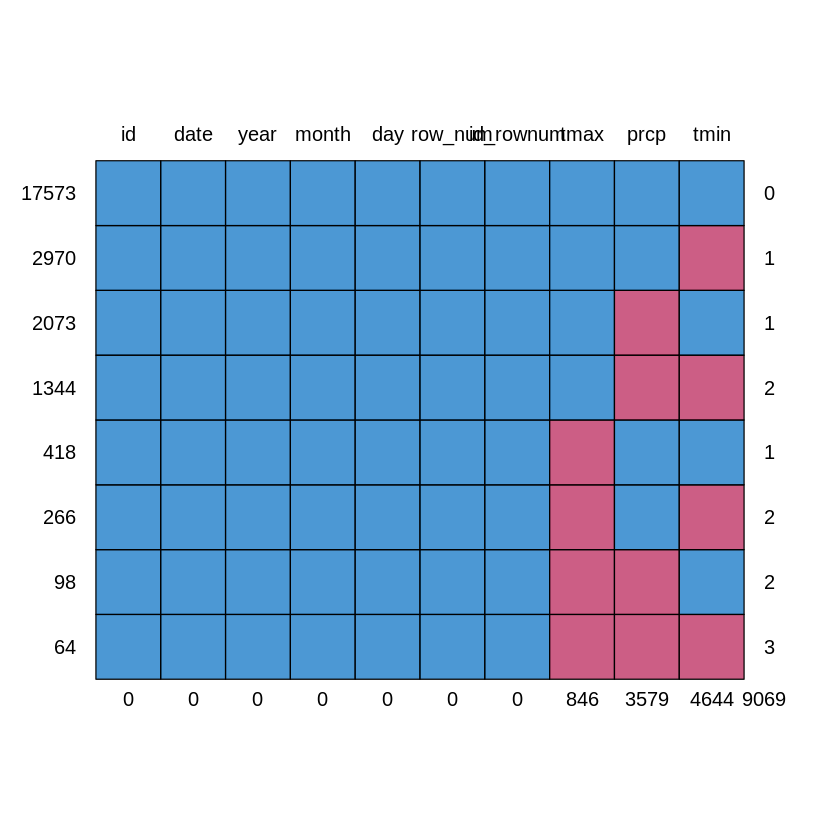

In [18]:
temperature_df <- F01_get_imp_temperature(station_ids = station_ids)
head(temperature_df)
dim(temperature_df)
data.table::fwrite(temperature_df, file = "../outputs/A_outputs/A31_japan_temperature.csv", row.names = FALSE, quote = FALSE)

# imp_df <- imp_ids %>% bind_rows()
# data.table::fwrite(imp_df, file = "../outputs/A_outputs/A31_japan_imp_rows.csv", row.names = FALSE, quote = FALSE)

In [19]:
data.table::fwrite(temperature_df, file = "../outputs/A_outputs/A31_japan_temperature.csv", row.names = FALSE, quote = FALSE)